In [1]:
from Ch14_Final import *
import numpy as np
from matplotlib import pyplot as plt

### Trivial tests

In [45]:
x = np.array([[1, 2, 3],[4, 5, 6]]).astype(np.float32)
w = np.array([[0.01, 0.02, 0.03, 0.04, 0.05], [0.1, 0.2, 0.3, 0.4, 0.5], [1, 2, 3, 4, 5]]).astype(np.float32)
b = np.array([0, 0, 0, 0, 0]).astype(np.float32)

dense = Layer_Dense(3, 5)
dense.weights = w
dense.biases = b
dense.forward(x)
print(dense.output)

[[ 3.21  6.42  9.63 12.84 16.05]
 [ 6.54 13.08 19.62 26.16 32.7 ]]


### Dataset

(300, 2)
(300,)
(300, 3)


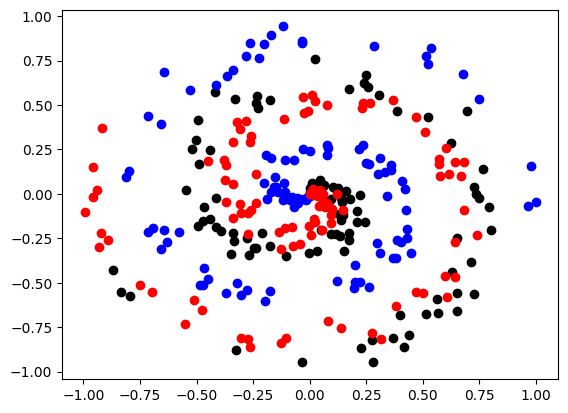

In [34]:
#X, y = spiral_data(samples=100, classes=3)

#export_dtype = np.float32

#np.save("X", X.astype(export_dtype), allow_pickle=False)
#np.save("y", y.astype(export_dtype), allow_pickle=False)
#y_2d = np.zeros((y.size, y.max() + 1))
#y_2d[np.arange(y.size), y] = 1
#np.save("y_2d", y_2d.astype(export_dtype), allow_pickle=False)

X = np.load("X.npy")
y = np.load("y.npy")
y_2d = np.load("y_2d.npy")

print(X.shape)
print(y.shape)
print(y_2d.shape)

plt.figure()
plt.scatter(X[y == 0][:,0], X[y == 0][:,1], color="k")
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], color="b")
plt.scatter(X[y == 2][:,0], X[y == 2][:,1], color="r")

y = y.astype(np.int32)

In [47]:
dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4,
                                bias_regularizer_l2=5e-4)
dense2 = Layer_Dense(64, 3)

#np.save("dense1.weights", dense1.weights, allow_pickle=False)
#np.save("dense1.biases", dense1.biases, allow_pickle=False)
#np.save("dense2.weights", dense2.weights, allow_pickle=False)
#np.save("dense2.biases", dense2.biases, allow_pickle=False)

dense1.weights = np.load("dense1.weights.npy")
dense1.biases = np.load("dense1.biases.npy")
dense2.weights = np.load("dense2.weights.npy")
dense2.biases = np.load("dense2.biases.npy")

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_Adam(learning_rate=0.02, decay=5e-7)

In [ ]:
# Train in loop
for epoch in range(10000):

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    data_loss = loss_activation.forward(dense2.output, y)

    # Calculate regularization penalty
    regularization_loss = \
        loss_activation.loss.regularization_loss(dense1) + \
        loss_activation.loss.regularization_loss(dense2)

    # Calculate overall loss
    loss = data_loss + regularization_loss

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
            f'acc: {accuracy:.3f}, ' +
            f'loss: {loss:.3f} (' +
            f'data_loss: {data_loss:.3f}, ' +
            f'reg_loss: {regularization_loss:.3f}), ' +
            f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.360, loss: 1.099 (data_loss: 1.099, reg_loss: 0.000), lr: 0.02


### XOR example

In [18]:
X = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y = np.array([[1, 0], [0, 1], [0, 1], [1, 0] ])

dense1 = Layer_Dense(2, 2)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(2, 2)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_Adam(0.1, 5e5)

# Train in loop
for epoch in range(10000):

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    data_loss = loss_activation.forward(dense2.output, y)

    # Calculate regularization penalty
    regularization_loss = \
        loss_activation.loss.regularization_loss(dense1) + \
        loss_activation.loss.regularization_loss(dense2)

    # Calculate overall loss
    loss = data_loss + regularization_loss

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
            f'acc: {accuracy:.3f}, ' +
            f'loss: {loss:.3f} (' +
            f'data_loss: {data_loss:.3f}, ' +
            f'reg_loss: {regularization_loss:.3f}), ' +
            f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


epoch: 0, acc: 0.500, loss: 0.693 (data_loss: 0.693, reg_loss: 0.000), lr: 0.1
epoch: 100, acc: 0.500, loss: 0.697 (data_loss: 0.697, reg_loss: 0.000), lr: 2.020201979389859e-09
epoch: 200, acc: 0.500, loss: 0.697 (data_loss: 0.697, reg_loss: 0.000), lr: 1.0050251155273858e-09
epoch: 300, acc: 0.500, loss: 0.697 (data_loss: 0.697, reg_loss: 0.000), lr: 6.688963165960113e-10
epoch: 400, acc: 0.500, loss: 0.697 (data_loss: 0.697, reg_loss: 0.000), lr: 5.012531303195332e-10
epoch: 500, acc: 0.500, loss: 0.697 (data_loss: 0.697, reg_loss: 0.000), lr: 4.008016015999936e-10
epoch: 600, acc: 0.500, loss: 0.697 (data_loss: 0.697, reg_loss: 0.000), lr: 3.3388981524577694e-10
epoch: 700, acc: 0.500, loss: 0.697 (data_loss: 0.697, reg_loss: 0.000), lr: 2.861230320854849e-10
epoch: 800, acc: 0.500, loss: 0.697 (data_loss: 0.697, reg_loss: 0.000), lr: 2.50312890487327e-10
epoch: 900, acc: 0.500, loss: 0.697 (data_loss: 0.697, reg_loss: 0.000), lr: 2.224694099611359e-10
epoch: 1000, acc: 0.500, loss